In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt

### Objetivo: 
Obter método de Runge-Kutta de ordem 3 e aplicar em problema (abaixo), comparando
resultado com solução exata.


In [2]:
class RungeKutta3Method:
    def __init__(self, a2, a3, c3=None):
        self.a2 = a2
        self.a3 = a3
        self.c3 = c3
        
        # Initialize coefficients as None
        self.c1 = None
        self.c2 = None
        self.b31 = None
        self.b32 = None
        self.b21 = a2  # Always equal to a2 initially
        
        # Compute coefficients
        self._compute_coefficients()

    def __repr__(self):
        """
        Return a detailed representation of the instance for debugging.
        """
        return (
            f"RungeKutta3Method(a2={self.a2}, a3={self.a3}, b21={self.b21}, "
            f"c1={self.c1}, c2={self.c2}, c3={self.c3}, b31={self.b31}, b32={self.b32})"
        )

    def __str__(self):
        """
        Return a user-readable representation of the instance,
        including the formatted expression for phi.
        """
        smp.pprint(self.get_phi_expr(), use_unicode=True)
        return ""

    def _compute_coefficients(self):
        """
        Solve the coefficients and store them as class attributes.
        """
        c1, c2, b31, b32 = smp.symbols('c1 c2 b31 b32')
        a2, a3 = self.a2, self.a3

        if a2 != a3 and a2 != smp.Rational(2, 3) and a2 != 0 and a3 != 0:
            # Compute coefficients directly
            self.c1 = (2 - 3 * (a2 + a3 - 2 * a2 * a3)) / (6 * a2 * a3)
            self.c2 = (2 - 3 * a3) / (6 * a2 * (a2 - a3))
            self.c3 = (3 * a2 - 2) / (6 * a3 * (a2 - a3))
            self.b31 = a3 * (a3 + 3 * a2**2 - 3 * a2) / (a2 * (3 * a2 - 2))
            self.b32 = a3 * (a2 - a3) / (a2 * (3 * a2 - 2))
        else:
            # Handle the case where c3 is needed but not provided
            if self.c3 is None:
                raise ValueError("c3 must be provided if a2 and a3 do not satisfy the conditions.")
            c3 = self.c3

            # Define the system of equations
            eq1 = smp.Eq(c1 + c2 + c3, 1)
            eq2 = smp.Eq(c2 * a2 + c3 * a3, smp.Rational(1, 2))
            eq3 = smp.Eq(c3 * b32 * a2, smp.Rational(1, 6))
            eq4 = smp.Eq(c2 * a2**2 + c3 * a3**2, smp.Rational(1, 3))
            eq5 = smp.Eq(a3, b31 + b32)

            # Solve the system
            sol = smp.solve([eq1, eq2, eq3, eq4, eq5], (c1, c2, b31, b32))
            if sol:
                self.c1 = sol[c1]
                self.c2 = sol[c2]
                self.b31 = sol[b31]
                self.b32 = sol[b32]
            else:
                raise ValueError("The provided a2 and a3 values do not satisfy the system.")

        # Update a2 and a3 based on b21, b31, and b32
        self.a2 = self.b21
        self.a3 = self.b31 + self.b32

    def get_phi_expr(self):
        """
        Return the expression for phi(x, y, h).
        """
        k1, k2, k3 = smp.symbols('k1 k2 k3')

        phi_expr = (
            self.c1 * k1 +
            self.c2 * k2 +
            self.c3 * k3
        )
        return phi_expr

    def get_coefficients(self):
        """
        Return the coefficients as a dictionary.
        """
        return {
            'a2': self.a2,
            'a3': self.a3,
            'b21': self.b21,
            'c1': self.c1,
            'c2': self.c2,
            'c3': self.c3,
            'b31': self.b31,
            'b32': self.b32,
        }

    def get_phi_lambda(self):
        simbolo_k1, simbolo_k2, simbolo_k3 = smp.symbols('k1 k2 k3')
        phi_expr = self.get_phi_expr()
        return smp.lambdify((simbolo_k1, simbolo_k2, simbolo_k3), phi_expr)
        
    def get_k_values(self, x, step_size, function):

        size = len(np.arange(0,1.01,step_size))
        y = np.ones(size)
        
        k_1 = np.ones(size)
        k_2 = np.ones(size)
        k_3 = np.ones(size)

        for n in range(0, size - 1):
            k_1[n] = k1 = function(x[n], y[n])
            k_2[n] = k2 = function(x[n] +self.a2 * step_size, y[n] + step_size * self.b21 * k1)
            k_3[n] = function(x[n] +self.a3 * step_size, y[n] + step_size * (self.b31 * k1 + self.b32 * k2))

        return np.array([k_1,k_2,k_3])
        
    def solve(self, x, step_size, function):
        
        size = len(x)
        y = np.ones(size)
        
        for n in range(0, size - 1):
            k1 = function(x[n], y[n])
            k2 = function(x[n] +self.a2 * step_size, y[n] + step_size * self.b21 * k1)
            k3 = function(x[n] +self.a3 * step_size, y[n] + step_size * (self.b31 * k1 + self.b32 * k2))
        
            # Substitute k values into the phi expression and evaluate
            phi_value = self.get_phi_lambda()
        
            # Update y[n+1]
            y[n + 1] = y[n] + step_size * float(phi_value(k1,k2,k3))  # Ensure phi_value is numeric
        return y


{'a2': 1/4, 'a3': 3/4, 'b21': 1/4, 'c1': 1/9, 'c2': 1/3, 'c3': 5/9, 'b31': -9/20, 'b32': 6/5}
k1/9 + k2/3 + 5*k3/9


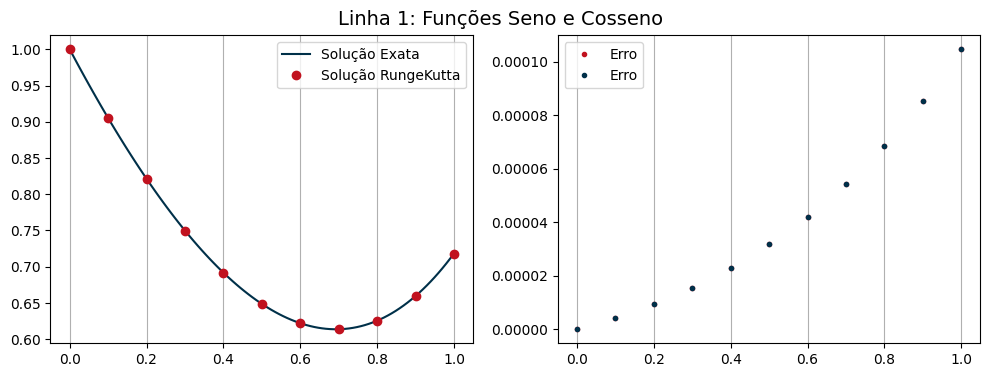

In [3]:
# Numerical setup

method1 = RungeKutta3Method(a2 = smp.Rational(1,4),
                            a3 = smp.Rational(3,4))
method2 = RungeKutta3Method(a2 = smp.Rational(198/73),
                            a3 = smp.Rational(89/5))
print(method1.get_coefficients())
print(method1.get_phi_expr())

h = 0.1
x = np.arange(0, 1+h, h)
x_plot = np.linspace(0,1,100)
sol_exata = lambda x: np.exp(x) - 2 * x
f = lambda x, y: y + 2 * x - 2

fig, ax = plt.subplots(1,2,figsize=(12,4))

fig.text(0.5, 0.92, "Linha 1: Funções Seno e Cosseno", ha='center', va='center', fontsize=14)


ax[0].plot(x_plot, np.exp(x_plot) - 2 * x_plot, label='Solução Exata', color='#003049')
ax[0].plot(x,method1.solve(x=x, step_size=h, function=f),'o',color='#c1121f', label='Solução RungeKutta')
# ax[0].set_xticks(x)
ax[0].grid(axis='x')
ax[0].legend()

ax[1].plot(x, np.exp(x) - 2 * x - method1.solve(x=x, step_size=h, function=f),'.', 
           color='#c1121f', label='Erro')
ax[1].plot(x, np.exp(x) - 2 * x - method2.solve(x=x, step_size=h, function=f),'.', 
           color='#003049', label='Erro')
# ax[1].set_xticks(x)
ax[1].grid(axis='x')
ax[1].legend()

plt.show()